In [18]:
# Install missing libraries if needed
!pip install -q seaborn

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('credit_risk_dataset.csv')
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


/tmp/ipython-input-19-3875527849.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-19-3875527849.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-19-3875527849.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

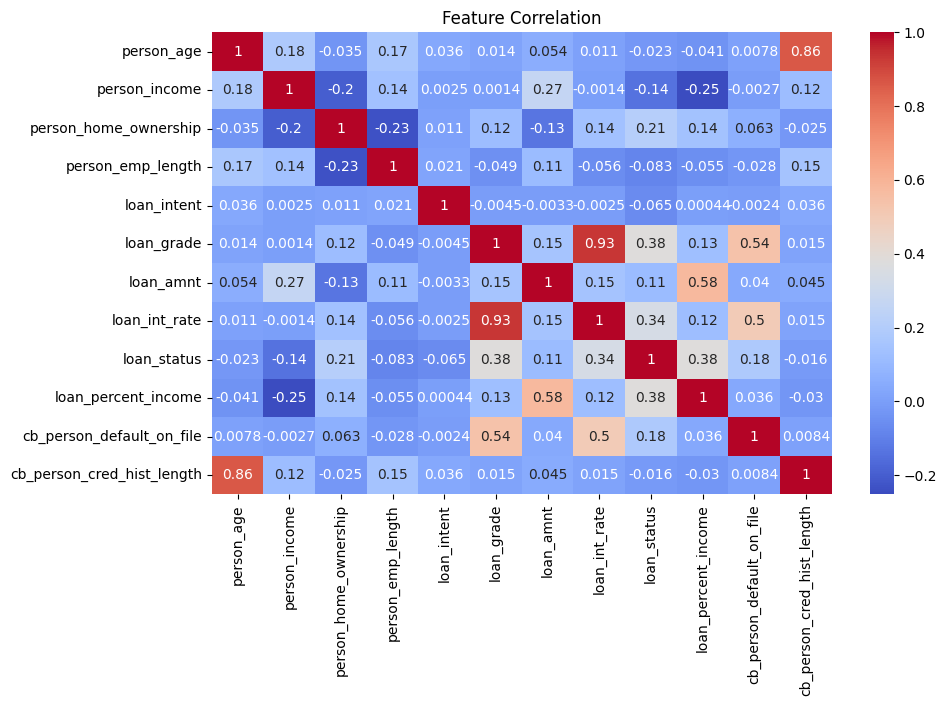

In [19]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # or use df.fillna(method='ffill') for forward fill

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Show correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [20]:
# Define features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']  # This is your target: 1 = Default, 0 = Non-default


In [21]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (22910, 11)
Test shape: (5728, 11)


In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

def evaluate_model(model, X_test, y_test, model_name="Model"):
    print(f"\n--- {model_name} Evaluation ---")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{model_name} ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()



--- Logistic Regression Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4443
           1       0.72      0.41      0.52      1285

    accuracy                           0.83      5728
   macro avg       0.78      0.68      0.71      5728
weighted avg       0.82      0.83      0.81      5728

ROC-AUC Score: 0.8294556820460814


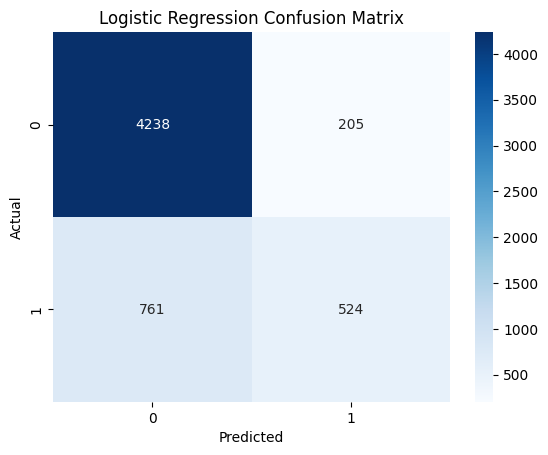

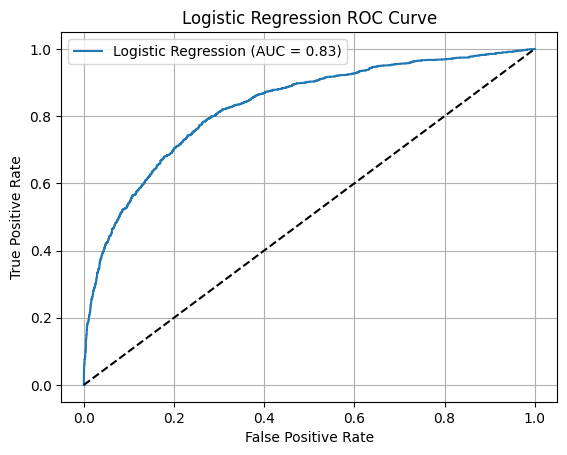


--- Decision Tree Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4443
           1       0.73      0.78      0.75      1285

    accuracy                           0.89      5728
   macro avg       0.83      0.85      0.84      5728
weighted avg       0.89      0.89      0.89      5728

ROC-AUC Score: 0.8469229347787058


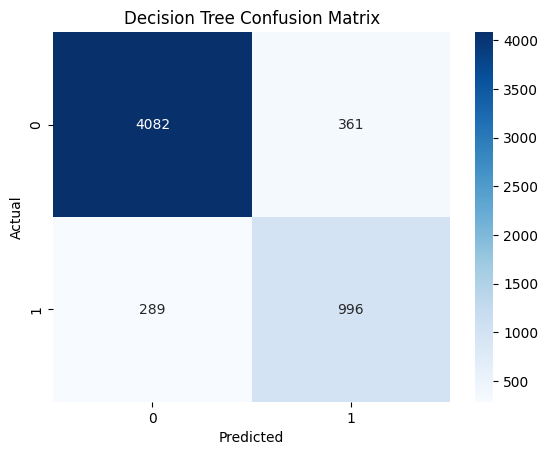

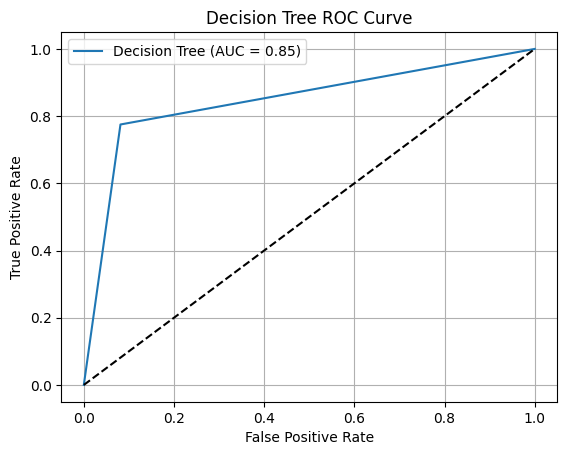


--- Random Forest Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4443
           1       0.98      0.71      0.82      1285

    accuracy                           0.93      5728
   macro avg       0.95      0.85      0.89      5728
weighted avg       0.93      0.93      0.93      5728

ROC-AUC Score: 0.9324124601195778


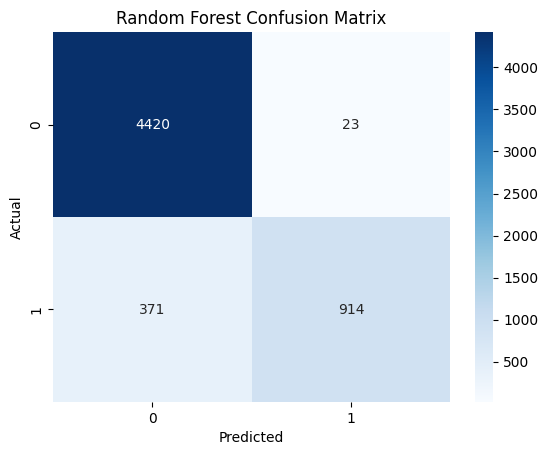

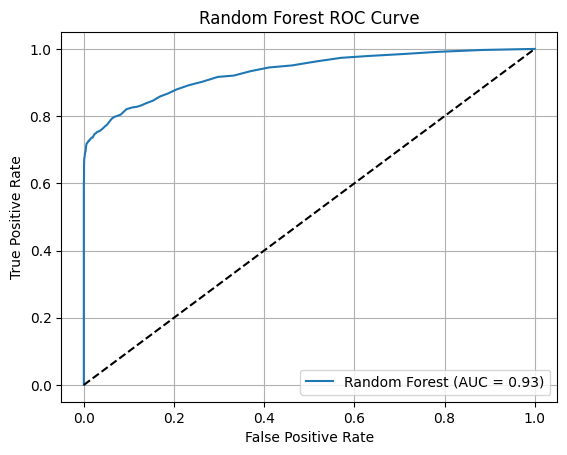

In [26]:
evaluate_model(lr, X_test, y_test, "Logistic Regression")
evaluate_model(dt, X_test, y_test, "Decision Tree")
evaluate_model(rf, X_test, y_test, "Random Forest")


In [27]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import joblib

# Save Random Forest model (or whichever performed best)
joblib.dump(rf, 'credit_score_model.pkl')
print("Model saved as credit_score_model.pkl")
